In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import imageio
import warnings
from IPython.display import Image
import networkx as nx
from scipy.stats import norm
from scipy.integrate import odeint
from collections import Counter
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [12, 10]

In [3]:
G = nx.watts_strogatz_graph(100, 4, 0.2, seed=5430)


In [4]:
def basic_model(G, MC_steps, a10, a01):
    
    # Parameters
    nodes = list(G.nodes)
    N = len(nodes)
    alpha = np.array([[1,a01],[a10,1]])
    
    # Precalculated variables
    spins = np.random.randint(2, size=N)
    random_spinsons = np.random.choice(nodes, MC_steps) # Spinsons to pick for each MC_step
    neighbors_list = [list(G.neighbors(node)) for node in nodes] # Neighbors for all nodes
    
    #magnetization
    magne = [np.sum(spins)/N]

    # MC steps
    for MC_step in range(MC_steps):

        # 1. Pick random spinson
        Si = random_spinsons[MC_step]
        
        # 2. Pick its neighbor        
        neighbor = np.random.choice(neighbors_list[Si])
        
        # 3. Get porbability of acceptance
        p = alpha[spins[Si], spins[neighbor]]
        
        # 4. Accept/reject opinion
        if np.random.random() < p:
            spins[Si] = spins[neighbor]
        
        magne.append(np.sum(spins)/N)
                        
    return magne

In [5]:
#outdated function definition
basic_model(G, 1000, 0.8, 0.2)

[0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.5,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.48,
 0.48,
 0.48,
 0.47,
 0.47,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.44,
 0.44,
 0.44,
 0.44,
 0.43,
 0.43,
 0.43,
 0.43,
 0.42,
 0.42,
 0.42,
 0.42,
 0.42,
 0.43,
 0.43,
 0.43,
 0.42,
 0.42,
 0.42,
 0.42,
 0.42,
 0.42,
 0.42,
 0.42,
 0.42,
 0.42,
 0.42,
 0.41,
 0.41,
 0.41,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.39,
 0.39,
 0.4,
 0.39,
 0.39,
 0.39,
 0.38,
 0.38,
 0.38,
 0.39,
 0.39,
 0.39,
 0.39,
 0.39,
 0.39,
 0.39,
 0.39,
 0.38,
 0.38,
 0.38,
 0.38,
 0.38,
 0.38,
 0.37,
 0.37,
 0.37,
 0.37,
 0.37,
 0.38,
 0.38

In [6]:
def model_w_twist(G, MC_steps, mean_a10, mean_a01, var):
    
    # Parameters
    nodes = list(G.nodes)
    N = len(nodes)
    alpha = np.array([[1,mean_a01],[mean_a10,1]])
    
    # Precalculated variables
    spins = np.random.randint(2, size=N)
    random_spinsons = np.random.choice(nodes, MC_steps) # Spinsons to pick for each MC_step
    neighbors_list = [list(G.neighbors(node)) for node in nodes] # Neighbors for all nodes
    
    #magnetization
    magne = [np.sum(spins)/N]

    # MC steps
    for MC_step in range(MC_steps):

        # 1. Pick random spinson
        Si = random_spinsons[MC_step]
        
        # 2. Pick its neighbor        
        neighbor = np.random.choice(neighbors_list[Si])
        
        # 3. Get porbability of acceptance
        p = alpha[spins[Si], spins[neighbor]]
        
        # 4. Accept/reject opinion
        if np.random.random() < norm.rvs(p, var):
            spins[Si] = spins[neighbor]
                        
        magne.append(np.sum(spins)/N)
                        
    return magne

In [7]:
def model_w_uniform(G, MC_steps, mean_a10, mean_a01, var):
    
    # Parameters
    nodes = list(G.nodes)
    N = len(nodes)
    alpha = np.array([[1,mean_a01],[mean_a10,1]])
    
    # Precalculated variables
    spins = np.random.randint(2, size=N)
    random_spinsons = np.random.choice(nodes, MC_steps) # Spinsons to pick for each MC_step
    neighbors_list = [list(G.neighbors(node)) for node in nodes] # Neighbors for all nodes
    
    #magnetization
    magne = [np.sum(spins)/N]

    # MC steps
    for MC_step in range(MC_steps):

        # 1. Pick random spinson
        Si = random_spinsons[MC_step]
        
        # 2. Pick its neighbor        
        neighbor = np.random.choice(neighbors_list[Si])
        
        # 3. Get porbability of acceptance
        p = alpha[spins[Si], spins[neighbor]]
        
        # 4. Accept/reject opinion
        if np.random.random() < np.random.uniform(p-var/2, p+var/2):
            spins[Si] = spins[neighbor]
                        
        magne.append(np.sum(spins)/N)
                        
    return magne

In [100]:
#outdated function definition
model_w_twist(G, 1000, 0.2, 0.8)

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [8]:
b = basic_model(G, 1000, 0.8, 0.2)
t = model_w_twist(G, 1000, 0.8, 0.2)
plt.plot(b, label='basic')
plt.plot(t, label='twisted')
plt.legend()
plt.show()

TypeError: model_w_twist() missing 1 required positional argument: 'var'

[]

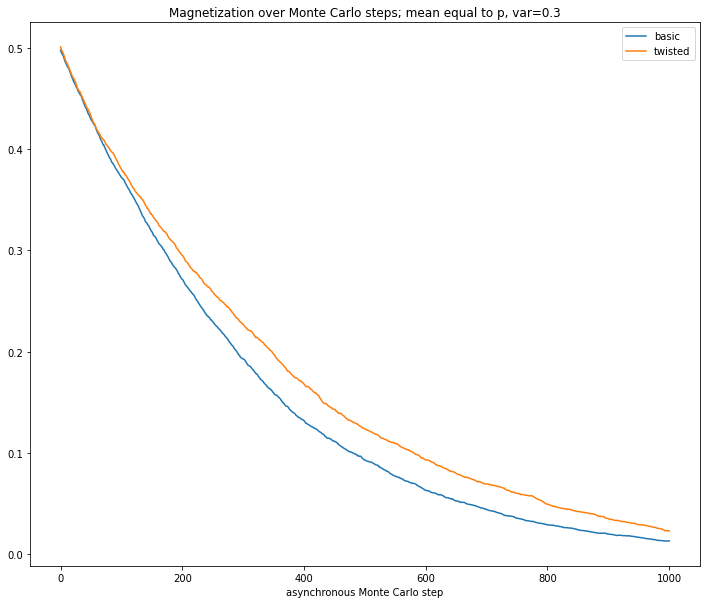

In [9]:
basic = np.zeros((100,1001))
twisted = np.zeros((100,1001))
for i in range(100):
    basic[i] = basic_model(G, 1000, 0.8, 0.2)
    twisted[i] = model_w_twist(G, 1000, 0.8, 0.2, 0.3)
plt.plot(np.mean(basic, axis=0), label='basic')
plt.plot(np.mean(twisted, axis=0), label='twisted')
plt.title("Magnetization over Monte Carlo steps; mean equal to p, var=0.3")
plt.xlabel('asynchronous Monte Carlo step')
plt.legend()
plt.plot()

[]

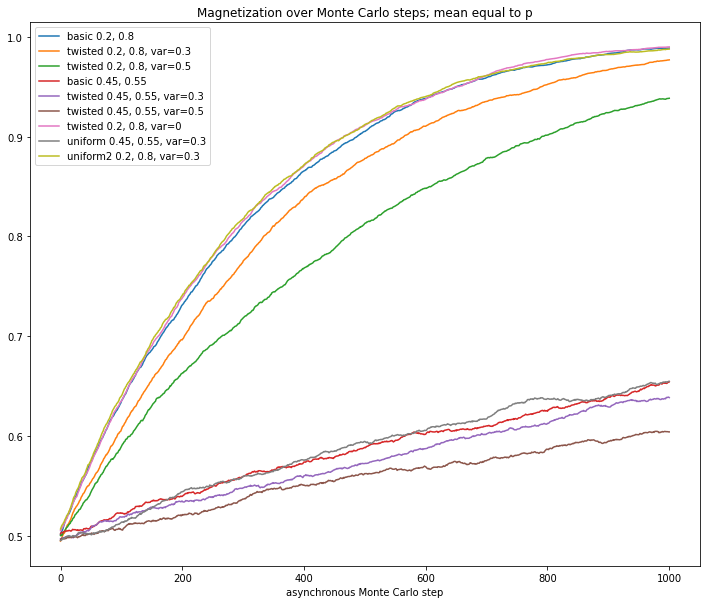

In [26]:
G = nx.watts_strogatz_graph(100, 4, 0.2, seed=5430)
basic = np.zeros((100,1001))
twisted = np.zeros((100,1001))
basic2 = np.zeros((100,1001))
twisted2 = np.zeros((100,1001))
twisted3 = np.zeros((100,1001))
twisted4 = np.zeros((100,1001))
twisted5 = np.zeros((100,1001))
uniform = np.zeros((100,1001))
uniform2 = np.zeros((100,1001))

for i in range(100):
    basic[i] = basic_model(G, 1000, 0.2, 0.8)
    twisted[i] = model_w_twist(G, 1000, 0.2, 0.8, 0.3)
    twisted2[i] = model_w_twist(G, 1000, 0.2, 0.8, 0.5)
    basic2[i] = basic_model(G, 1000, 0.45, 0.55)
    twisted3[i] = model_w_twist(G, 1000, 0.45, 0.55, 0.3)
    twisted4[i] = model_w_twist(G, 1000, 0.45, 0.55, 0.5)
    twisted5[i] = model_w_twist(G, 1000, 0.2, 0.8, 0)
    uniform[i] = model_w_uniform(G, 1000, 0.45, 0.55, var=0.3)
    uniform2[i] = model_w_uniform(G, 1000,  0.2, 0.8, var=0.3)
    
plt.plot(np.mean(basic, axis=0), label='basic 0.2, 0.8')
plt.plot(np.mean(twisted, axis=0), label='twisted 0.2, 0.8, var=0.3')
plt.plot(np.mean(twisted2, axis=0), label='twisted 0.2, 0.8, var=0.5')
plt.plot(np.mean(basic2, axis=0), label='basic 0.45, 0.55')
plt.plot(np.mean(twisted3, axis=0), label='twisted 0.45, 0.55, var=0.3')
plt.plot(np.mean(twisted4, axis=0), label='twisted 0.45, 0.55, var=0.5')
plt.plot(np.mean(twisted5, axis=0), label='twisted 0.2, 0.8, var=0')
plt.plot(np.mean(uniform, axis=0), label='uniform 0.45, 0.55, var=0.3')
plt.plot(np.mean(uniform2, axis=0), label='uniform2 0.2, 0.8, var=0.3')

plt.title("Magnetization over Monte Carlo steps; mean equal to p")
plt.xlabel('asynchronous Monte Carlo step')
plt.legend()
plt.plot()

[]

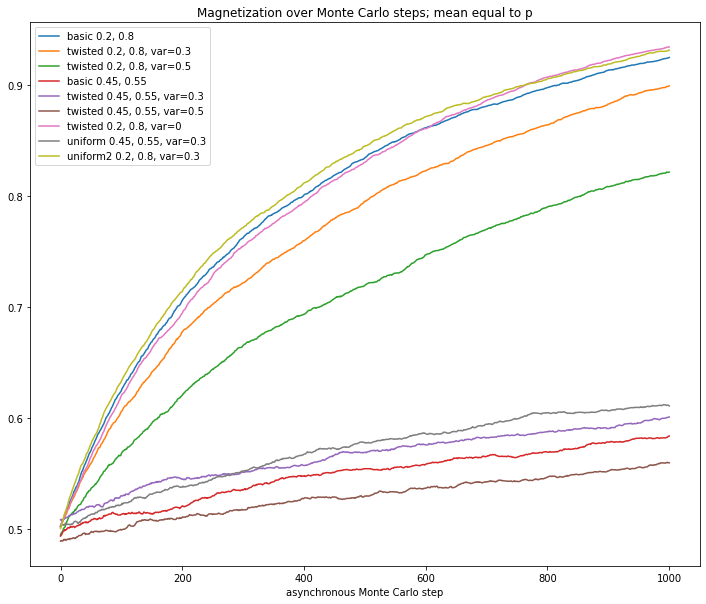

In [29]:
G = nx.watts_strogatz_graph(100, 2, 0.5, seed=5430)
basic = np.zeros((100,1001))
twisted = np.zeros((100,1001))
basic2 = np.zeros((100,1001))
twisted2 = np.zeros((100,1001))
twisted3 = np.zeros((100,1001))
twisted4 = np.zeros((100,1001))
twisted5 = np.zeros((100,1001))
uniform = np.zeros((100,1001))
uniform2 = np.zeros((100,1001))

for i in range(100):
    basic[i] = basic_model(G, 1000, 0.2, 0.8)
    twisted[i] = model_w_twist(G, 1000, 0.2, 0.8, 0.3)
    twisted2[i] = model_w_twist(G, 1000, 0.2, 0.8, 0.5)
    basic2[i] = basic_model(G, 1000, 0.45, 0.55)
    twisted3[i] = model_w_twist(G, 1000, 0.45, 0.55, 0.3)
    twisted4[i] = model_w_twist(G, 1000, 0.45, 0.55, 0.5)
    twisted5[i] = model_w_twist(G, 1000, 0.2, 0.8, 0)
    uniform[i] = model_w_uniform(G, 1000, 0.45, 0.55, var=0.3)
    uniform2[i] = model_w_uniform(G, 1000,  0.2, 0.8, var=0.3)
    
plt.plot(np.mean(basic, axis=0), label='basic 0.2, 0.8')
plt.plot(np.mean(twisted, axis=0), label='twisted 0.2, 0.8, var=0.3')
plt.plot(np.mean(twisted2, axis=0), label='twisted 0.2, 0.8, var=0.5')
plt.plot(np.mean(basic2, axis=0), label='basic 0.45, 0.55')
plt.plot(np.mean(twisted3, axis=0), label='twisted 0.45, 0.55, var=0.3')
plt.plot(np.mean(twisted4, axis=0), label='twisted 0.45, 0.55, var=0.5')
plt.plot(np.mean(twisted5, axis=0), label='twisted 0.2, 0.8, var=0')
plt.plot(np.mean(uniform, axis=0), label='uniform 0.45, 0.55, var=0.3')
plt.plot(np.mean(uniform2, axis=0), label='uniform2 0.2, 0.8, var=0.3')

plt.title("Magnetization over Monte Carlo steps; mean equal to p")
plt.xlabel('asynchronous Monte Carlo step')
plt.legend()
plt.plot()

[]

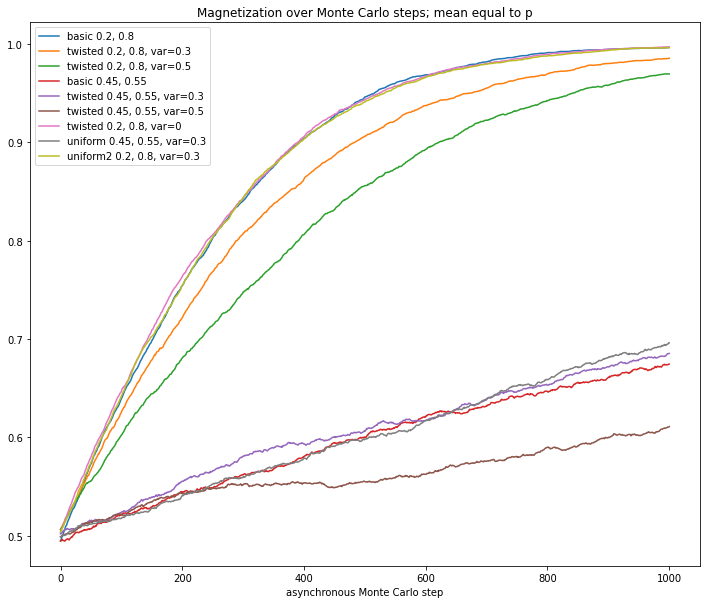

In [27]:
G = nx.barabasi_albert_graph(100, 4, seed=5430)
basic = np.zeros((100,1001))
twisted = np.zeros((100,1001))
basic2 = np.zeros((100,1001))
twisted2 = np.zeros((100,1001))
twisted3 = np.zeros((100,1001))
twisted4 = np.zeros((100,1001))
twisted5 = np.zeros((100,1001))
uniform = np.zeros((100,1001))
uniform2 = np.zeros((100,1001))

for i in range(100):
    basic[i] = basic_model(G, 1000, 0.2, 0.8)
    twisted[i] = model_w_twist(G, 1000, 0.2, 0.8, 0.3)
    twisted2[i] = model_w_twist(G, 1000, 0.2, 0.8, 0.5)
    basic2[i] = basic_model(G, 1000, 0.45, 0.55)
    twisted3[i] = model_w_twist(G, 1000, 0.45, 0.55, 0.3)
    twisted4[i] = model_w_twist(G, 1000, 0.45, 0.55, 0.5)
    twisted5[i] = model_w_twist(G, 1000, 0.2, 0.8, 0)
    uniform[i] = model_w_uniform(G, 1000, 0.45, 0.55, var=0.3)
    uniform2[i] = model_w_uniform(G, 1000,  0.2, 0.8, var=0.3)
    
plt.plot(np.mean(basic, axis=0), label='basic 0.2, 0.8')
plt.plot(np.mean(twisted, axis=0), label='twisted 0.2, 0.8, var=0.3')
plt.plot(np.mean(twisted2, axis=0), label='twisted 0.2, 0.8, var=0.5')
plt.plot(np.mean(basic2, axis=0), label='basic 0.45, 0.55')
plt.plot(np.mean(twisted3, axis=0), label='twisted 0.45, 0.55, var=0.3')
plt.plot(np.mean(twisted4, axis=0), label='twisted 0.45, 0.55, var=0.5')
plt.plot(np.mean(twisted5, axis=0), label='twisted 0.2, 0.8, var=0')
plt.plot(np.mean(uniform, axis=0), label='uniform 0.45, 0.55, var=0.3')
plt.plot(np.mean(uniform2, axis=0), label='uniform2 0.2, 0.8, var=0.3')

plt.title("Magnetization over Monte Carlo steps; mean equal to p")
plt.xlabel('asynchronous Monte Carlo step')
plt.legend()
plt.plot()

[]

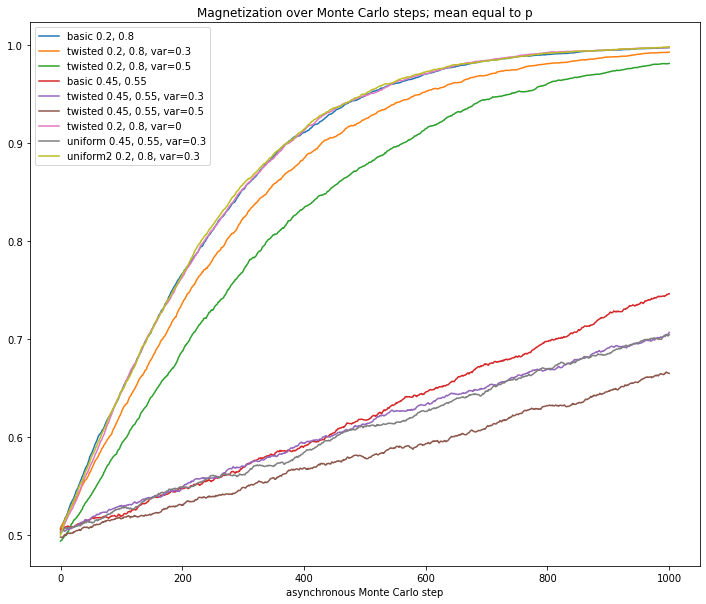

In [28]:
G = nx.fast_gnp_random_graph(100, 0.5, seed=5430)
basic = np.zeros((100,1001))
twisted = np.zeros((100,1001))
basic2 = np.zeros((100,1001))
twisted2 = np.zeros((100,1001))
twisted3 = np.zeros((100,1001))
twisted4 = np.zeros((100,1001))
twisted5 = np.zeros((100,1001))
uniform = np.zeros((100,1001))
uniform2 = np.zeros((100,1001))

for i in range(100):
    basic[i] = basic_model(G, 1000, 0.2, 0.8)
    twisted[i] = model_w_twist(G, 1000, 0.2, 0.8, 0.3)
    twisted2[i] = model_w_twist(G, 1000, 0.2, 0.8, 0.5)
    basic2[i] = basic_model(G, 1000, 0.45, 0.55)
    twisted3[i] = model_w_twist(G, 1000, 0.45, 0.55, 0.3)
    twisted4[i] = model_w_twist(G, 1000, 0.45, 0.55, 0.5)
    twisted5[i] = model_w_twist(G, 1000, 0.2, 0.8, 0)
    uniform[i] = model_w_uniform(G, 1000, 0.45, 0.55, var=0.3)
    uniform2[i] = model_w_uniform(G, 1000,  0.2, 0.8, var=0.3)
    
plt.plot(np.mean(basic, axis=0), label='basic 0.2, 0.8')
plt.plot(np.mean(twisted, axis=0), label='twisted 0.2, 0.8, var=0.3')
plt.plot(np.mean(twisted2, axis=0), label='twisted 0.2, 0.8, var=0.5')
plt.plot(np.mean(basic2, axis=0), label='basic 0.45, 0.55')
plt.plot(np.mean(twisted3, axis=0), label='twisted 0.45, 0.55, var=0.3')
plt.plot(np.mean(twisted4, axis=0), label='twisted 0.45, 0.55, var=0.5')
plt.plot(np.mean(twisted5, axis=0), label='twisted 0.2, 0.8, var=0')
plt.plot(np.mean(uniform, axis=0), label='uniform 0.45, 0.55, var=0.3')
plt.plot(np.mean(uniform2, axis=0), label='uniform2 0.2, 0.8, var=0.3')

plt.title("Magnetization over Monte Carlo steps; mean equal to p")
plt.xlabel('asynchronous Monte Carlo step')
plt.legend()
plt.plot()

## Random

In [93]:
G = nx.fast_gnp_random_graph(100, 0.05, seed=5431)
#nx.draw(G)

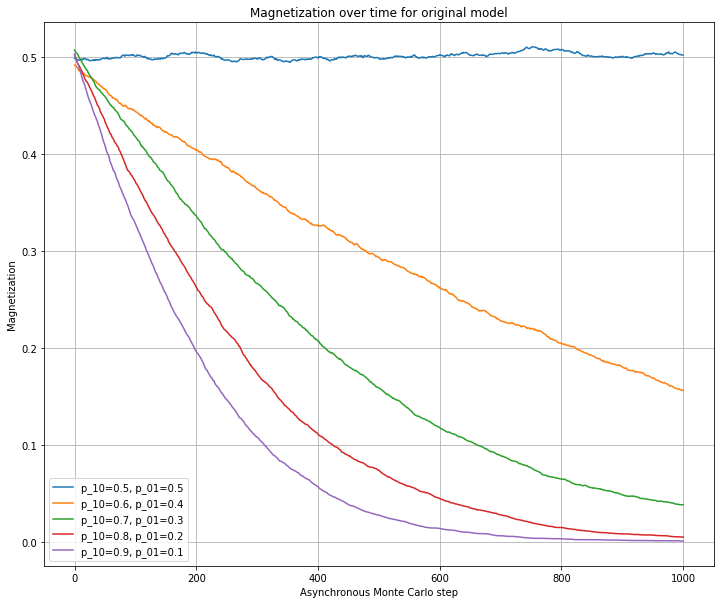

In [94]:
# Original model
basic = np.zeros((100,1001))
twisted = np.zeros((100,1001))
twisted2 = np.zeros((100,1001))
twisted3 = np.zeros((100,1001))
twisted4 = np.zeros((100,1001))

for i in range(100):
    basic[i] = basic_model(G, 1000, 0.5, 0.5)
    twisted[i] = basic_model(G, 1000, 0.6, 0.4)
    twisted2[i] = basic_model(G, 1000, 0.7, 0.3)
    twisted3[i] = basic_model(G, 1000, 0.8, 0.2)
    twisted4[i] = basic_model(G, 1000, 0.9, 0.1)


plt.plot(np.mean(basic, axis=0), label='p_10=0.5, p_01=0.5')
plt.plot(np.mean(twisted, axis=0), label='p_10=0.6, p_01=0.4')
plt.plot(np.mean(twisted2, axis=0), label='p_10=0.7, p_01=0.3')
plt.plot(np.mean(twisted3, axis=0), label='p_10=0.8, p_01=0.2')
plt.plot(np.mean(twisted4, axis=0), label='p_10=0.9, p_01=0.1')


plt.title("Magnetization over time for original model")
plt.xlabel('Asynchronous Monte Carlo step')
plt.ylabel('Magnetization')
plt.grid()
plt.legend()
plt.savefig('random(100, 0.05)_Original_model.png')
plt.show()

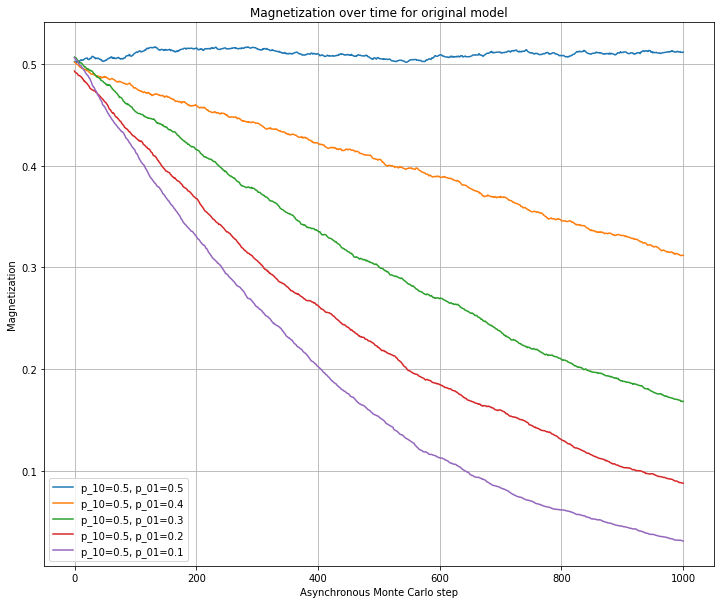

In [98]:
# Original model
basic = np.zeros((100,1001))
twisted = np.zeros((100,1001))
twisted2 = np.zeros((100,1001))
twisted3 = np.zeros((100,1001))
twisted4 = np.zeros((100,1001))

for i in range(100):
    basic[i] = basic_model(G, 1000, 0.5, 0.5)
    twisted[i] = basic_model(G, 1000, 0.5, 0.4)
    twisted2[i] = basic_model(G, 1000, 0.5, 0.3)
    twisted3[i] = basic_model(G, 1000, 0.5, 0.2)
    twisted4[i] = basic_model(G, 1000, 0.5, 0.1)


plt.plot(np.mean(basic, axis=0), label='p_10=0.5, p_01=0.5')
plt.plot(np.mean(twisted, axis=0), label='p_10=0.5, p_01=0.4')
plt.plot(np.mean(twisted2, axis=0), label='p_10=0.5, p_01=0.3')
plt.plot(np.mean(twisted3, axis=0), label='p_10=0.5, p_01=0.2')
plt.plot(np.mean(twisted4, axis=0), label='p_10=0.5, p_01=0.1')


plt.title("Magnetization over time for original model")
plt.xlabel('Asynchronous Monte Carlo step')
plt.ylabel('Magnetization')
plt.grid()
plt.legend()
plt.savefig('random(100, 0.05)_Original_model_one_param.png')
plt.show()

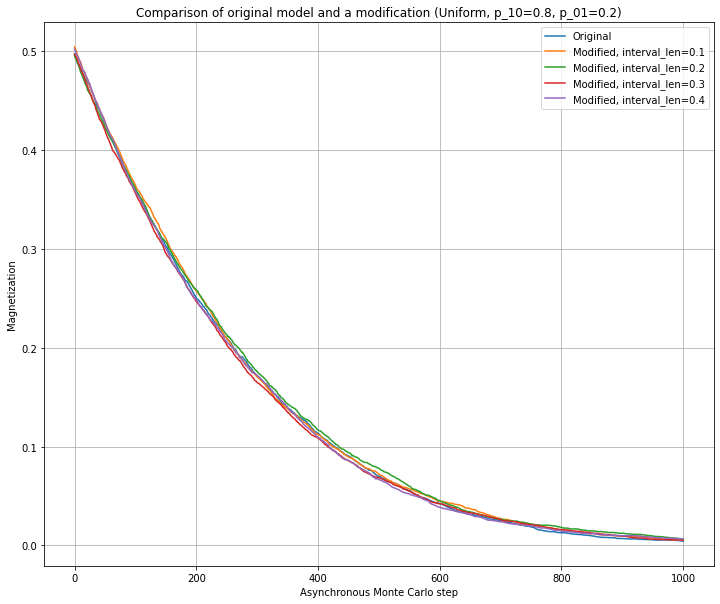

In [95]:
# Modified model with uniform distribution
basic = np.zeros((100,1001))
twisted = np.zeros((100,1001))
twisted2 = np.zeros((100,1001))
twisted3 = np.zeros((100,1001))
twisted4 = np.zeros((100,1001))

for i in range(100):
    basic[i] = basic_model(G, 1000, 0.8, 0.2)
    twisted[i] =  model_w_uniform(G, 1000, 0.8, 0.2, var=0.1)
    twisted2[i] = model_w_uniform(G, 1000, 0.8, 0.2, var=0.2)
    twisted3[i] = model_w_uniform(G, 1000, 0.8, 0.2, var=0.3)
    twisted4[i] = model_w_uniform(G, 1000, 0.8, 0.2, var=0.4)


plt.plot(np.mean(basic, axis=0), label='Original')
plt.plot(np.mean(twisted, axis=0), label='Modified, interval_len=0.1')
plt.plot(np.mean(twisted2, axis=0), label='Modified, interval_len=0.2')
plt.plot(np.mean(twisted3, axis=0), label='Modified, interval_len=0.3')
plt.plot(np.mean(twisted4, axis=0), label='Modified, interval_len=0.4')


plt.title("Comparison of original model and a modification (Uniform, p_10=0.8, p_01=0.2)")
plt.xlabel('Asynchronous Monte Carlo step')
plt.ylabel('Magnetization')
plt.grid()
plt.legend()
plt.savefig('random(100, 0.05)_uniform.png')
plt.show()

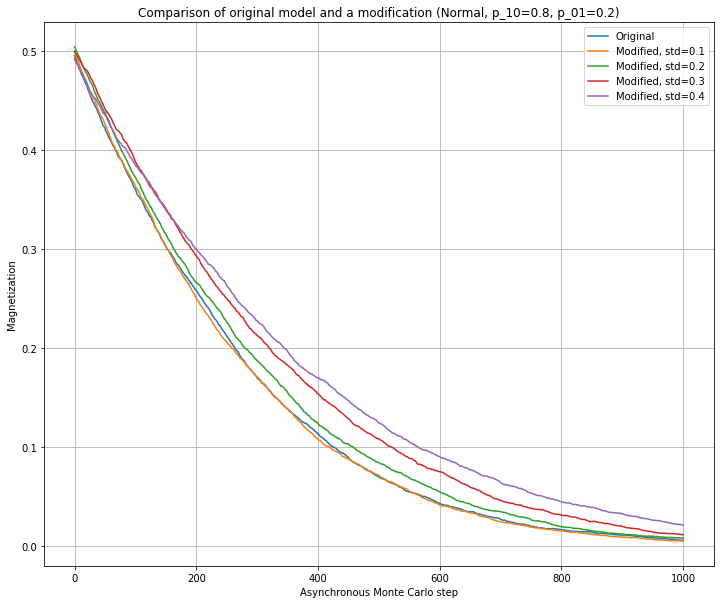

In [99]:
# variances
basic = np.zeros((100,1001))
twisted = np.zeros((100,1001))
twisted2 = np.zeros((100,1001))
twisted3 = np.zeros((100,1001))
twisted4 = np.zeros((100,1001))

for i in range(100):
    basic[i] = basic_model(G, 1000, 0.8, 0.2)
    twisted[i] = model_w_twist(G, 1000, 0.8, 0.2, 0.1)
    twisted2[i] = model_w_twist(G, 1000, 0.8, 0.2, 0.2)
    twisted3[i] = model_w_twist(G, 1000, 0.8, 0.2, 0.3)
    twisted4[i] = model_w_twist(G, 1000, 0.8, 0.2, 0.4)


plt.plot(np.mean(basic, axis=0), label='Original')
plt.plot(np.mean(twisted, axis=0), label='Modified, std=0.1')
plt.plot(np.mean(twisted2, axis=0), label='Modified, std=0.2')
plt.plot(np.mean(twisted3, axis=0), label='Modified, std=0.3')
plt.plot(np.mean(twisted4, axis=0), label='Modified, std=0.4')


plt.title("Comparison of original model and a modification (Normal, p_10=0.8, p_01=0.2)")
plt.xlabel('Asynchronous Monte Carlo step')
plt.ylabel('Magnetization')
plt.grid()
plt.legend()
plt.savefig('random(100, 0.05)_Normal_std.png')
plt.show()

# Wattz-strogatz

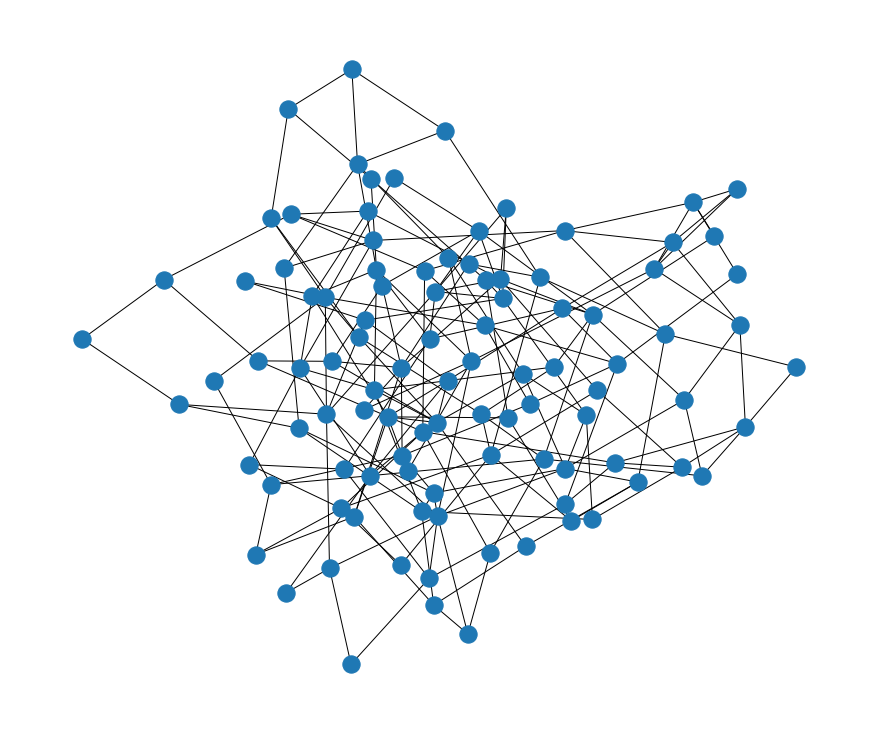

In [100]:
G = nx.watts_strogatz_graph(100, 4, 0.5, seed=5430)
nx.draw(G)

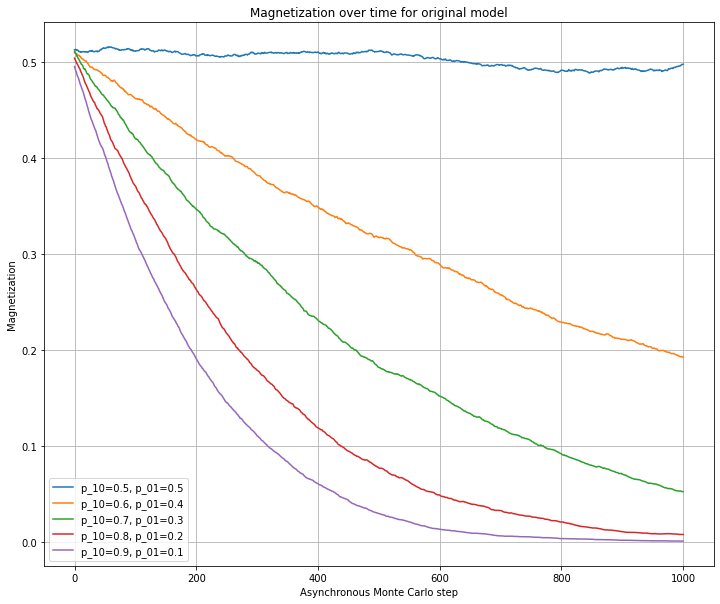

In [101]:
# Original model
basic = np.zeros((100,1001))
twisted = np.zeros((100,1001))
twisted2 = np.zeros((100,1001))
twisted3 = np.zeros((100,1001))
twisted4 = np.zeros((100,1001))

for i in range(100):
    basic[i] = basic_model(G, 1000, 0.5, 0.5)
    twisted[i] = basic_model(G, 1000, 0.6, 0.4)
    twisted2[i] = basic_model(G, 1000, 0.7, 0.3)
    twisted3[i] = basic_model(G, 1000, 0.8, 0.2)
    twisted4[i] = basic_model(G, 1000, 0.9, 0.1)


plt.plot(np.mean(basic, axis=0), label='p_10=0.5, p_01=0.5')
plt.plot(np.mean(twisted, axis=0), label='p_10=0.6, p_01=0.4')
plt.plot(np.mean(twisted2, axis=0), label='p_10=0.7, p_01=0.3')
plt.plot(np.mean(twisted3, axis=0), label='p_10=0.8, p_01=0.2')
plt.plot(np.mean(twisted4, axis=0), label='p_10=0.9, p_01=0.1')


plt.title("Magnetization over time for original model")
plt.xlabel('Asynchronous Monte Carlo step')
plt.ylabel('Magnetization')
plt.grid()
plt.legend()
plt.savefig('watts_strogatz_graph(100, 4, 0.5)_Original_model.png')
plt.show()

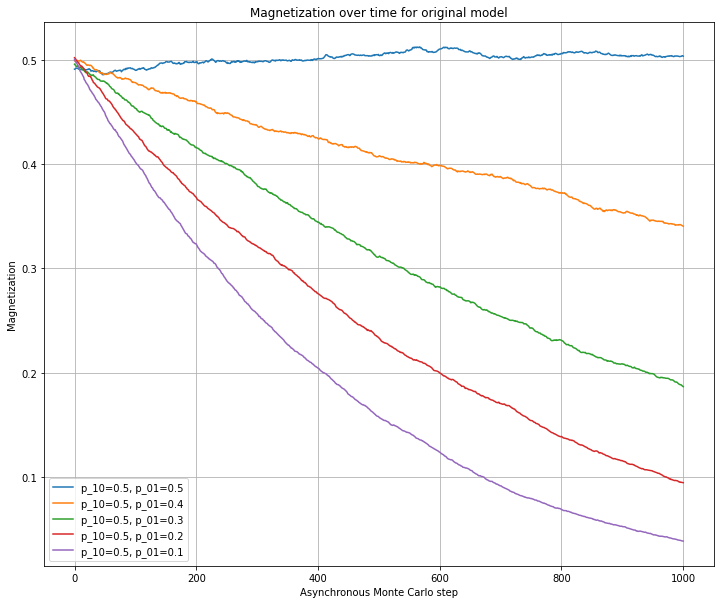

In [102]:
# Original model
basic = np.zeros((100,1001))
twisted = np.zeros((100,1001))
twisted2 = np.zeros((100,1001))
twisted3 = np.zeros((100,1001))
twisted4 = np.zeros((100,1001))

for i in range(100):
    basic[i] = basic_model(G, 1000, 0.5, 0.5)
    twisted[i] = basic_model(G, 1000, 0.5, 0.4)
    twisted2[i] = basic_model(G, 1000, 0.5, 0.3)
    twisted3[i] = basic_model(G, 1000, 0.5, 0.2)
    twisted4[i] = basic_model(G, 1000, 0.5, 0.1)


plt.plot(np.mean(basic, axis=0), label='p_10=0.5, p_01=0.5')
plt.plot(np.mean(twisted, axis=0), label='p_10=0.5, p_01=0.4')
plt.plot(np.mean(twisted2, axis=0), label='p_10=0.5, p_01=0.3')
plt.plot(np.mean(twisted3, axis=0), label='p_10=0.5, p_01=0.2')
plt.plot(np.mean(twisted4, axis=0), label='p_10=0.5, p_01=0.1')


plt.title("Magnetization over time for original model")
plt.xlabel('Asynchronous Monte Carlo step')
plt.ylabel('Magnetization')
plt.grid()
plt.legend()
plt.savefig('watts_strogatz_graph(100, 4, 0.5)_Original_model_one_param.png')
plt.show()

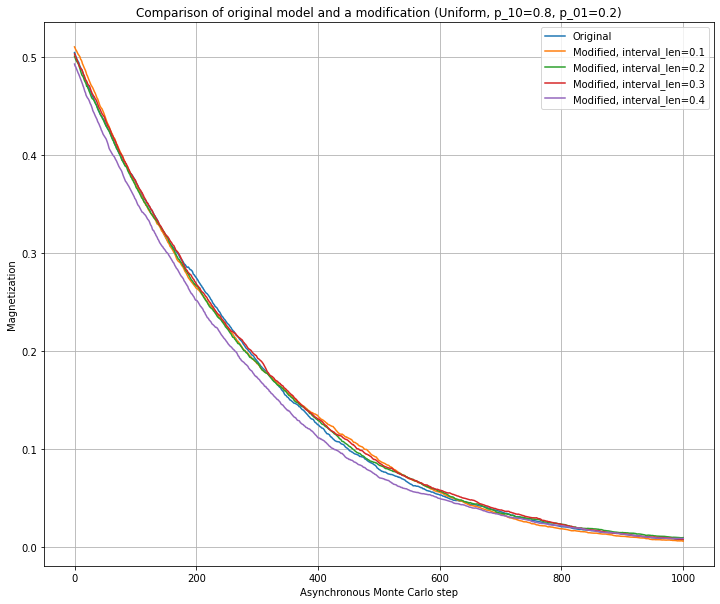

In [103]:
# Modified model with uniform distribution
basic = np.zeros((100,1001))
twisted = np.zeros((100,1001))
twisted2 = np.zeros((100,1001))
twisted3 = np.zeros((100,1001))
twisted4 = np.zeros((100,1001))

for i in range(100):
    basic[i] = basic_model(G, 1000, 0.8, 0.2)
    twisted[i] =  model_w_uniform(G, 1000, 0.8, 0.2, var=0.1)
    twisted2[i] = model_w_uniform(G, 1000, 0.8, 0.2, var=0.2)
    twisted3[i] = model_w_uniform(G, 1000, 0.8, 0.2, var=0.3)
    twisted4[i] = model_w_uniform(G, 1000, 0.8, 0.2, var=0.4)


plt.plot(np.mean(basic, axis=0), label='Original')
plt.plot(np.mean(twisted, axis=0), label='Modified, interval_len=0.1')
plt.plot(np.mean(twisted2, axis=0), label='Modified, interval_len=0.2')
plt.plot(np.mean(twisted3, axis=0), label='Modified, interval_len=0.3')
plt.plot(np.mean(twisted4, axis=0), label='Modified, interval_len=0.4')


plt.title("Comparison of original model and a modification (Uniform, p_10=0.8, p_01=0.2)")
plt.xlabel('Asynchronous Monte Carlo step')
plt.ylabel('Magnetization')
plt.grid()
plt.legend()
plt.savefig('watts_strogatz_graph(100, 4, 0.5)_uniform.png')
plt.show()

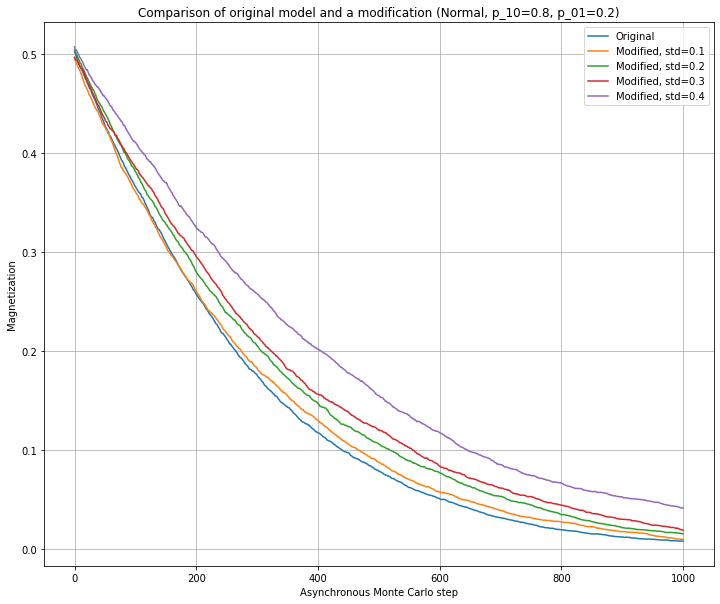

In [104]:
# variances
basic = np.zeros((100,1001))
twisted = np.zeros((100,1001))
twisted2 = np.zeros((100,1001))
twisted3 = np.zeros((100,1001))
twisted4 = np.zeros((100,1001))

for i in range(100):
    basic[i] = basic_model(G, 1000, 0.8, 0.2)
    twisted[i] = model_w_twist(G, 1000, 0.8, 0.2, 0.1)
    twisted2[i] = model_w_twist(G, 1000, 0.8, 0.2, 0.2)
    twisted3[i] = model_w_twist(G, 1000, 0.8, 0.2, 0.3)
    twisted4[i] = model_w_twist(G, 1000, 0.8, 0.2, 0.4)


plt.plot(np.mean(basic, axis=0), label='Original')
plt.plot(np.mean(twisted, axis=0), label='Modified, std=0.1')
plt.plot(np.mean(twisted2, axis=0), label='Modified, std=0.2')
plt.plot(np.mean(twisted3, axis=0), label='Modified, std=0.3')
plt.plot(np.mean(twisted4, axis=0), label='Modified, std=0.4')


plt.title("Comparison of original model and a modification (Normal, p_10=0.8, p_01=0.2)")
plt.xlabel('Asynchronous Monte Carlo step')
plt.ylabel('Magnetization')
plt.grid()
plt.legend()
plt.savefig('watts_strogatz_graph(100, 4, 0.5)_Normal_std.png')
plt.show()

# Albert barabasi

In [105]:
G = nx.barabasi_albert_graph(100, 4, seed=5430)
#nx.draw(G)

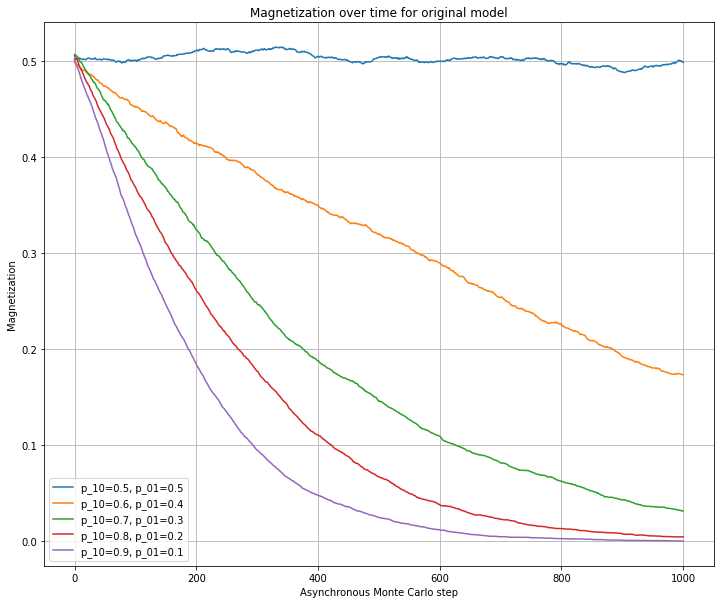

In [106]:
# Original model
basic = np.zeros((100,1001))
twisted = np.zeros((100,1001))
twisted2 = np.zeros((100,1001))
twisted3 = np.zeros((100,1001))
twisted4 = np.zeros((100,1001))

for i in range(100):
    basic[i] = basic_model(G, 1000, 0.5, 0.5)
    twisted[i] = basic_model(G, 1000, 0.6, 0.4)
    twisted2[i] = basic_model(G, 1000, 0.7, 0.3)
    twisted3[i] = basic_model(G, 1000, 0.8, 0.2)
    twisted4[i] = basic_model(G, 1000, 0.9, 0.1)


plt.plot(np.mean(basic, axis=0), label='p_10=0.5, p_01=0.5')
plt.plot(np.mean(twisted, axis=0), label='p_10=0.6, p_01=0.4')
plt.plot(np.mean(twisted2, axis=0), label='p_10=0.7, p_01=0.3')
plt.plot(np.mean(twisted3, axis=0), label='p_10=0.8, p_01=0.2')
plt.plot(np.mean(twisted4, axis=0), label='p_10=0.9, p_01=0.1')


plt.title("Magnetization over time for original model")
plt.xlabel('Asynchronous Monte Carlo step')
plt.ylabel('Magnetization')
plt.grid()
plt.legend()
plt.savefig('barabasi_albert_graph(100, 4)_Original_model.png')
plt.show()

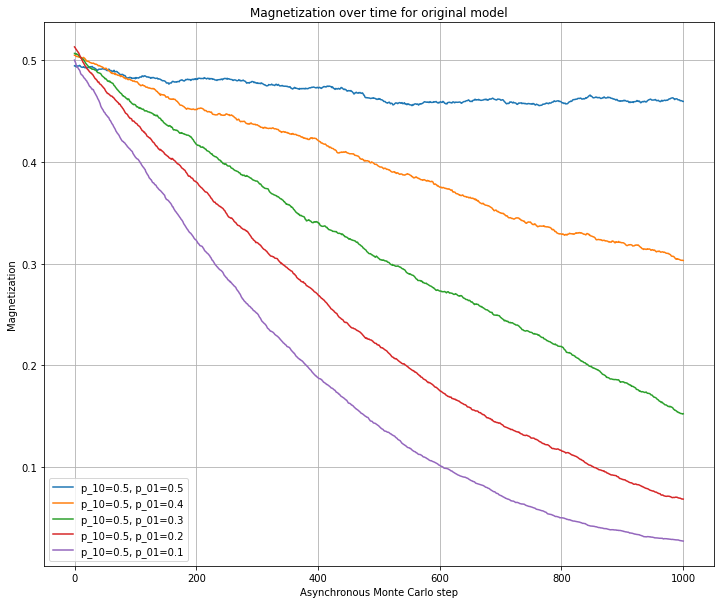

In [107]:
# Original model
basic = np.zeros((100,1001))
twisted = np.zeros((100,1001))
twisted2 = np.zeros((100,1001))
twisted3 = np.zeros((100,1001))
twisted4 = np.zeros((100,1001))

for i in range(100):
    basic[i] = basic_model(G, 1000, 0.5, 0.5)
    twisted[i] = basic_model(G, 1000, 0.5, 0.4)
    twisted2[i] = basic_model(G, 1000, 0.5, 0.3)
    twisted3[i] = basic_model(G, 1000, 0.5, 0.2)
    twisted4[i] = basic_model(G, 1000, 0.5, 0.1)


plt.plot(np.mean(basic, axis=0), label='p_10=0.5, p_01=0.5')
plt.plot(np.mean(twisted, axis=0), label='p_10=0.5, p_01=0.4')
plt.plot(np.mean(twisted2, axis=0), label='p_10=0.5, p_01=0.3')
plt.plot(np.mean(twisted3, axis=0), label='p_10=0.5, p_01=0.2')
plt.plot(np.mean(twisted4, axis=0), label='p_10=0.5, p_01=0.1')


plt.title("Magnetization over time for original model")
plt.xlabel('Asynchronous Monte Carlo step')
plt.ylabel('Magnetization')
plt.grid()
plt.legend()
plt.savefig('barabasi_albert_graph(100, 4)_Original_model_one_param.png')
plt.show()

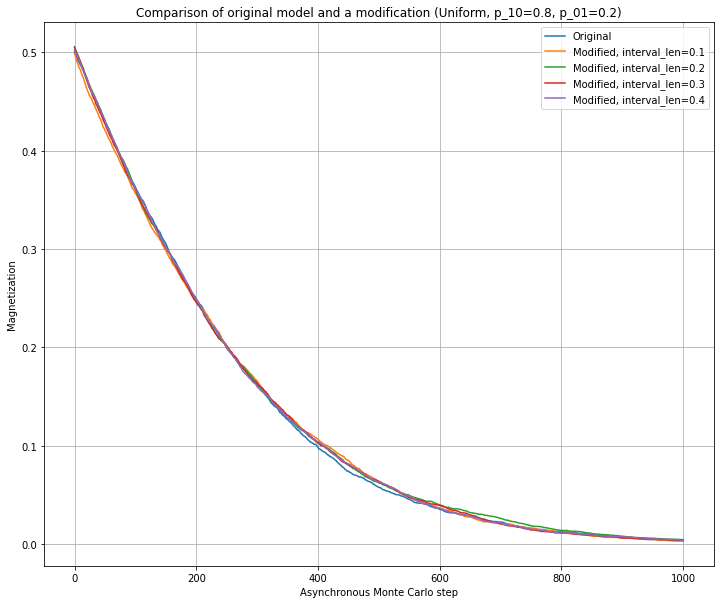

In [108]:
# Modified model with uniform distribution
basic = np.zeros((100,1001))
twisted = np.zeros((100,1001))
twisted2 = np.zeros((100,1001))
twisted3 = np.zeros((100,1001))
twisted4 = np.zeros((100,1001))

for i in range(100):
    basic[i] = basic_model(G, 1000, 0.8, 0.2)
    twisted[i] =  model_w_uniform(G, 1000, 0.8, 0.2, var=0.1)
    twisted2[i] = model_w_uniform(G, 1000, 0.8, 0.2, var=0.2)
    twisted3[i] = model_w_uniform(G, 1000, 0.8, 0.2, var=0.3)
    twisted4[i] = model_w_uniform(G, 1000, 0.8, 0.2, var=0.4)


plt.plot(np.mean(basic, axis=0), label='Original')
plt.plot(np.mean(twisted, axis=0), label='Modified, interval_len=0.1')
plt.plot(np.mean(twisted2, axis=0), label='Modified, interval_len=0.2')
plt.plot(np.mean(twisted3, axis=0), label='Modified, interval_len=0.3')
plt.plot(np.mean(twisted4, axis=0), label='Modified, interval_len=0.4')


plt.title("Comparison of original model and a modification (Uniform, p_10=0.8, p_01=0.2)")
plt.xlabel('Asynchronous Monte Carlo step')
plt.ylabel('Magnetization')
plt.grid()
plt.legend()
plt.savefig('barabasi_albert_graph(100, 4)_uniform.png')
plt.show()

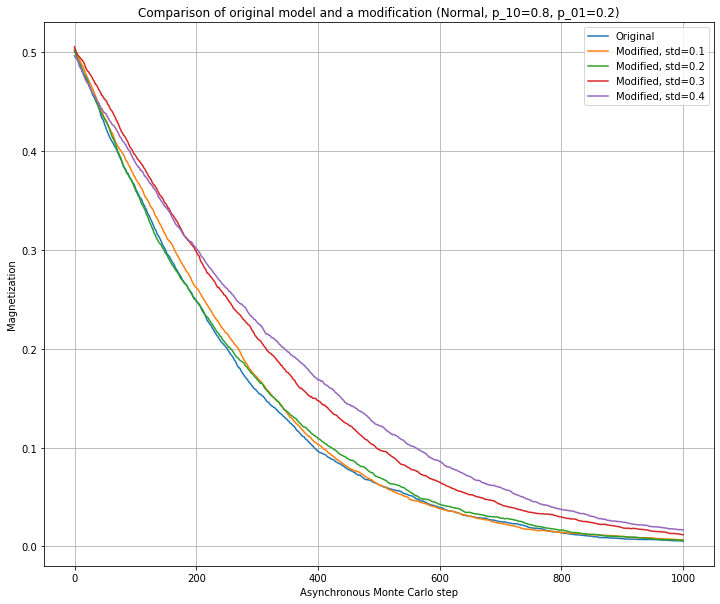

In [109]:
# variances
basic = np.zeros((100,1001))
twisted = np.zeros((100,1001))
twisted2 = np.zeros((100,1001))
twisted3 = np.zeros((100,1001))
twisted4 = np.zeros((100,1001))

for i in range(100):
    basic[i] = basic_model(G, 1000, 0.8, 0.2)
    twisted[i] = model_w_twist(G, 1000, 0.8, 0.2, 0.1)
    twisted2[i] = model_w_twist(G, 1000, 0.8, 0.2, 0.2)
    twisted3[i] = model_w_twist(G, 1000, 0.8, 0.2, 0.3)
    twisted4[i] = model_w_twist(G, 1000, 0.8, 0.2, 0.4)


plt.plot(np.mean(basic, axis=0), label='Original')
plt.plot(np.mean(twisted, axis=0), label='Modified, std=0.1')
plt.plot(np.mean(twisted2, axis=0), label='Modified, std=0.2')
plt.plot(np.mean(twisted3, axis=0), label='Modified, std=0.3')
plt.plot(np.mean(twisted4, axis=0), label='Modified, std=0.4')


plt.title("Comparison of original model and a modification (Normal, p_10=0.8, p_01=0.2)")
plt.xlabel('Asynchronous Monte Carlo step')
plt.ylabel('Magnetization')
plt.grid()
plt.legend()
plt.savefig('barabasi_albert_graph(100, 4)_Normal_std.png')
plt.show()